# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | keflavik
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | chibougamau
Processing Record 6 of Set 1 | ugoofaaru
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | buala
Processing Record 9 of Set 1 | puerto baquerizo moreno
Processing Record 10 of Set 1 | sur
Processing Record 11 of Set 1 | rumoi
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | kish
Processing Record 16 of Set 1 | remire-montjoly
Processing Record 17 of Set 1 | winnemucca
Processing Record 18 of Set 1 | smithers
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | fredericton
Processing Record 21 of Set 1 | dhulia
Processing Record 22 of Set 1 | margaret river
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,keflavik,64.0049,-22.5624,10.95,100,100,4.12,IS,1718917111
1,albany,42.6001,-73.9662,34.46,62,59,2.03,US,1718916915
2,wailua homesteads,22.0669,-159.3780,27.24,74,75,8.75,US,1718917113
3,souillac,-20.5167,57.5167,23.21,60,75,5.14,MU,1718917114
4,chibougamau,49.9168,-74.3659,20.79,37,20,6.17,CA,1718917115


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,10.95,100,100,4.12,IS,1718917111
1,albany,42.6001,-73.9662,34.46,62,59,2.03,US,1718916915
2,wailua homesteads,22.0669,-159.3780,27.24,74,75,8.75,US,1718917113
3,souillac,-20.5167,57.5167,23.21,60,75,5.14,MU,1718917114
4,chibougamau,49.9168,-74.3659,20.79,37,20,6.17,CA,1718917115


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

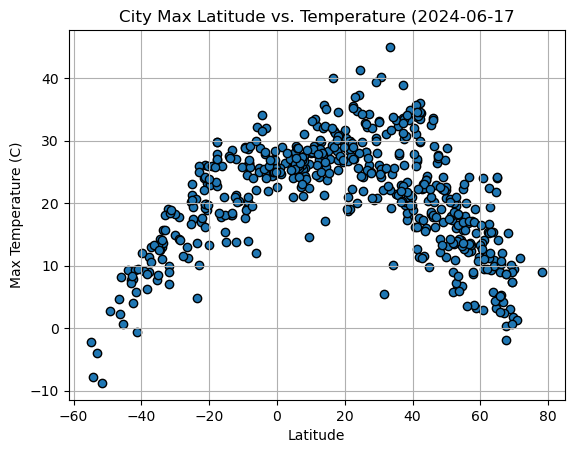

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

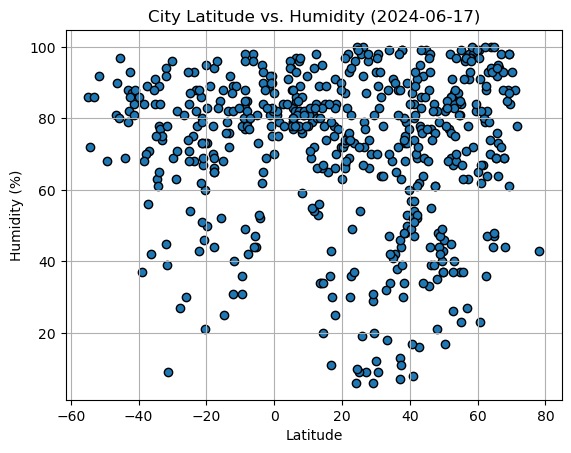

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter( city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

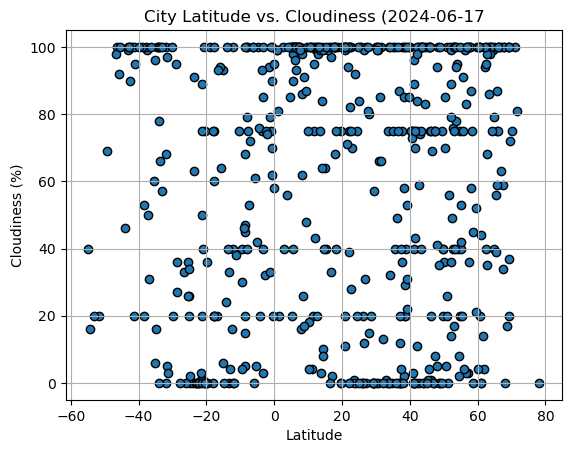

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter( city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

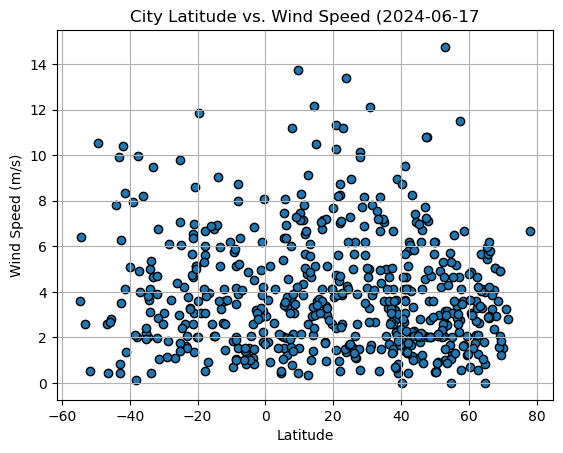

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter( city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
plt.grid(True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title):
    
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    
    # Get regression values
    regress_values = x * slope + intercept
    
    # Line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}"

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,10.95,100,100,4.12,IS,1718917111
1,albany,42.6001,-73.9662,34.46,62,59,2.03,US,1718916915
2,wailua homesteads,22.0669,-159.3780,27.24,74,75,8.75,US,1718917113
4,chibougamau,49.9168,-74.3659,20.79,37,20,6.17,CA,1718917115
5,ugoofaaru,5.6667,73.0000,28.31,80,100,8.09,MV,1718917117


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,souillac,-20.5167,57.5167,23.21,60,75,5.14,MU,1718917114
6,blackmans bay,-43.0167,147.3167,7.63,88,99,0.45,AU,1718917118
7,buala,-8.1450,159.5921,26.47,85,100,3.89,SB,1718917119
8,puerto baquerizo moreno,-0.9000,-89.6000,24.55,78,75,6.17,EC,1718917120
11,adamstown,-25.0660,-130.1015,21.29,71,26,7.06,PN,1718917123


###  Temperature vs. Latitude Linear Regression Plot

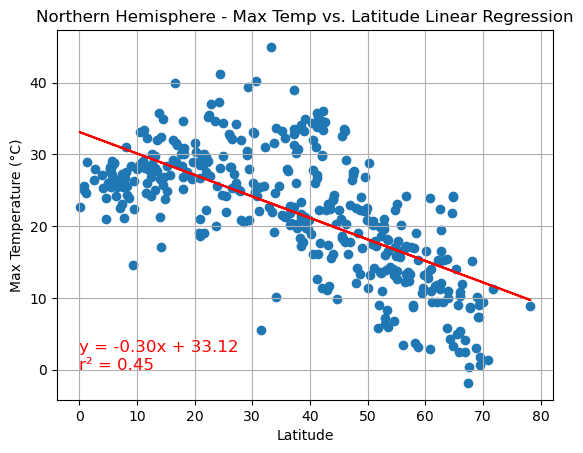

In [17]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation of the regression line and the r-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nr² = {rvalue**2:.2f}", text_coordinates, fontsize=12, color="red")
    
    # Labeling
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Save the plot
    plt.savefig(f"output_data/{title.replace(' ', '_')}.png")
    
    # Show plot
    plt.show()

# Example usage of the function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (°C)", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", (0, 0), "Northern Hemisphere")


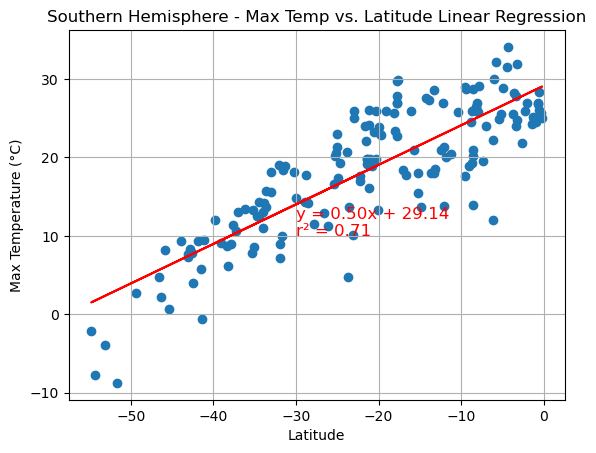

In [20]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (°C)", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", (-30, 10), "Southern Hemisphere")


**Discussion about the linear relationship:** 

In the northern hemisphere, there is a negative slope meaning that as the latitude increases the tempuratures decrease. As we move farther from the equator the tempuratures decrease. In the southern hemisphere, we observe latitude increases associated with a rise in tempuratures. Cities closer to the equator have higher max tempuratures. 

### Humidity vs. Latitude Linear Regression Plot

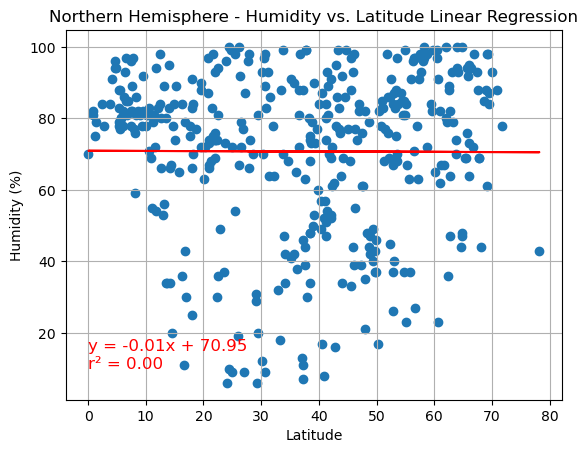

R-value for Northern Hemisphere: -0.004410211175403617


In [22]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation of the regression line and the r-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nr² = {rvalue**2:.2f}", text_coordinates, fontsize=12, color="red")
    
    # Labeling
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    
    # Show plot
    plt.show()
    
    return rvalue

# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Humidity"]
rvalue_north = plot_linear_regression(x_values_north, y_values_north, "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (0, 10), "Northern Hemisphere")
print(f"R-value for Northern Hemisphere: {rvalue_north}")

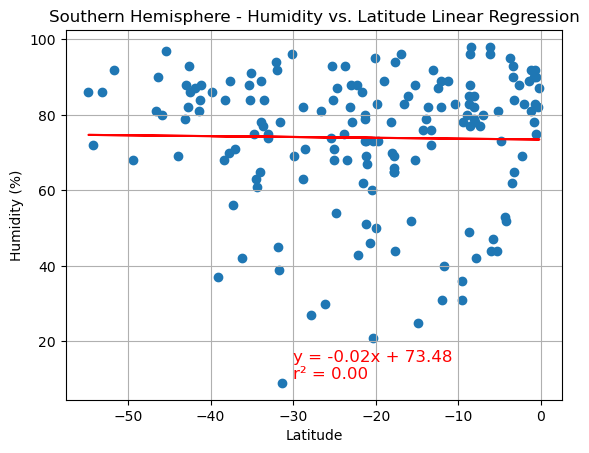

R-value for Southern Hemisphere: -0.017370679637148428


In [24]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation of the regression line and the r-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nr² = {rvalue**2:.2f}", text_coordinates, fontsize=12, color="red")
    
    # Labeling
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    
    # Show plot
    plt.show()
    
    return rvalue


# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Humidity"]
rvalue_south = plot_linear_regression(x_values_south, y_values_south, "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-30, 10), "Southern Hemisphere")
print(f"R-value for Southern Hemisphere: {rvalue_south}")


**Discussion about the linear relationship:** 
There is a slight negative slope in both the southern and northern hemisphere. In the southern hemisphere, as the latitude increases, there is a slight decrease in humidity. In the northern hemisphere, as latitude increases, there is a slight decrease in humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

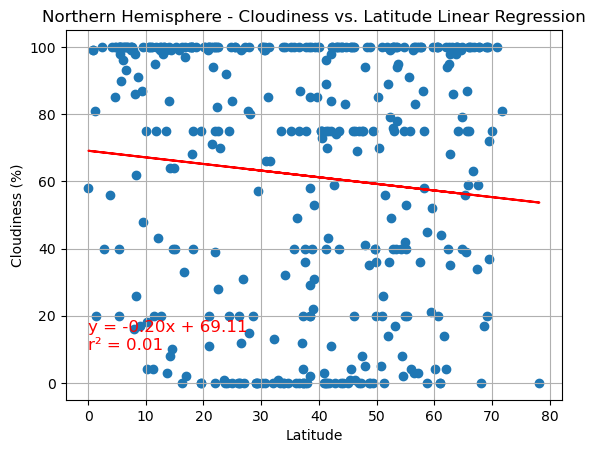

R-value for Northern Hemisphere: -0.09886412412209793


In [33]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation of the regression line and the r-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nr² = {rvalue**2:.2f}", text_coordinates, fontsize=12, color="red")
    
    # Labeling
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    
    # Show plot
    plt.show()
    
    return rvalue

# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Cloudiness"]
rvalue_north = plot_linear_regression(x_values_north, y_values_north, "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (0, 10))
print(f"R-value for Northern Hemisphere: {rvalue_north}")


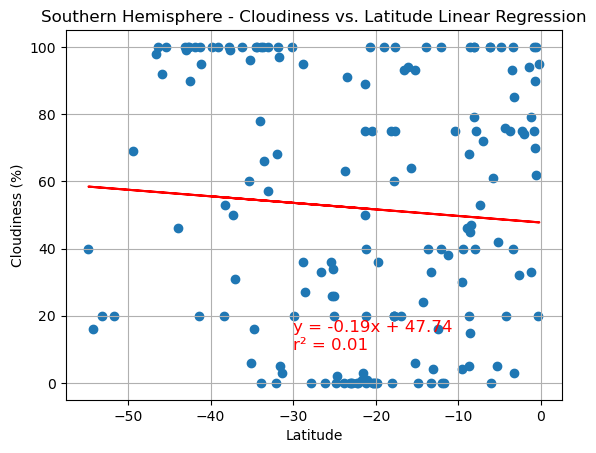

R-value for Southern Hemisphere: -0.0715636988356819


In [34]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation of the regression line and the r-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nr² = {rvalue**2:.2f}", text_coordinates, fontsize=12, color="red")
    
    # Labeling
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    
    # Show plot
    plt.show()
    
    return rvalue

# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Cloudiness"]
rvalue_south = plot_linear_regression(x_values_south, y_values_south, "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-30, 10))
print(f"R-value for Southern Hemisphere: {rvalue_south}")


**Discussion about the linear relationship:**
There is an inverse relationship between latitude and cloudiness in both the southern and northern hemisphere since there is a negative slope in both graphs. 

### Wind Speed vs. Latitude Linear Regression Plot

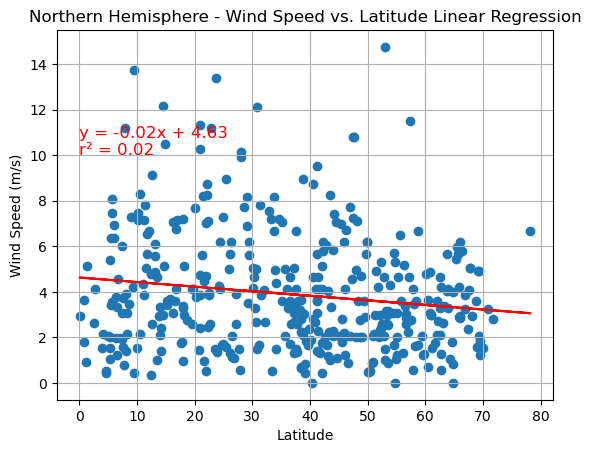

Slope: -0.020071177977226958
R-value for Northern Hemisphere: -0.150772026658375


In [35]:
# Northern Hemisphere
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Define a function to create Linear Regression plots and return the r-value
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation of the regression line and the r-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nr² = {rvalue**2:.2f}", text_coordinates, fontsize=12, color="red")
    
    # Labeling
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Save the plot
    plt.savefig(f"output_data/{title.replace(' ', '_')}.png")
    
    # Show plot
    plt.show()
    
    return slope, rvalue

# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Wind Speed"]
slope_north, rvalue_north = plot_linear_regression(x_values_north, y_values_north, "Latitude", "Wind Speed (m/s)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (0, 10))

# Print the results
print(f"Slope: {slope_north}")
print(f"R-value for Northern Hemisphere: {rvalue_north}")


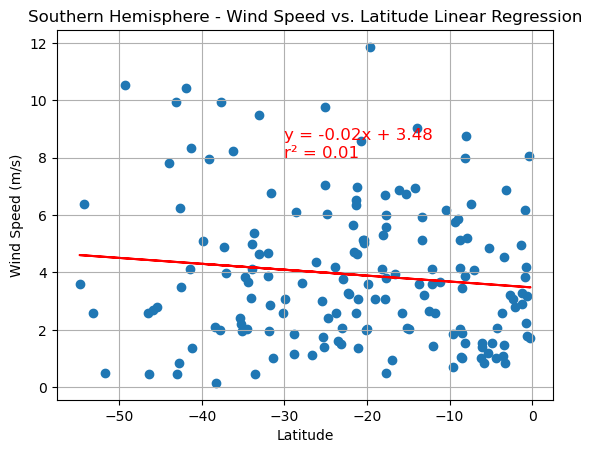

Slope: -0.02058712169825185
R-value for Southern Hemisphere: -0.11661890765633015


In [36]:
# Southern Hemisphere
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Define a function to create Linear Regression plots and return the r-value
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation of the regression line and the r-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nr² = {rvalue**2:.2f}", text_coordinates, fontsize=12, color="red")
    
    # Labeling
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Save the plot
    plt.savefig(f"output_data/{title.replace(' ', '_')}.png")
    
    # Show plot
    plt.show()
    
    return slope, rvalue

# How to use for Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Wind Speed"]
slope_south, rvalue_south = plot_linear_regression(x_values_south, y_values_south, "Latitude", "Wind Speed (m/s)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-30, 8))

# Print the results
print(f"Slope: {slope_south}")
print(f"R-value for Southern Hemisphere: {rvalue_south}")


**Discussion about the linear relationship:** 
Inverse relationship is also found between wind speed and latitude in both the northern and southern hemisphere. As laitude increases, wind speed decreases in the southern hemisphere. In the northern hemisphere, as laitude increases, wind speed decreases. 